In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
# run cell for interactive plots
import mpld3
mpld3.enable_notebook()

In [2]:
from reldresal import *

In [3]:
data5 = load_log('torque_7nm.log.gz')
data6 = load_log('torque_5nm.log.gz')

[-6.36141222, -4.2358599, 0, 4.102296750000001, 6.24679218]
[-6.5325800000000003, -4.6298899999999996, 0, 3.9, 5.7018199999999997]


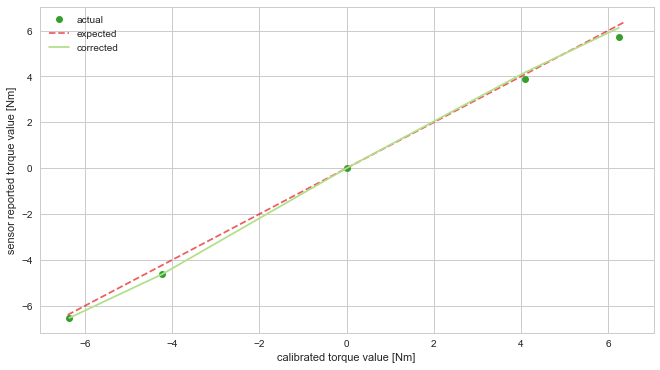

In [4]:
# torque wrench values calculated using
# mass plates and distance measurement
colors = sns.color_palette('Paired', 10)

g = 9.81
t_calibration = [-2.921*g*0.222, -1.945*g*0.222, 0, 1.945*g*0.215, 2.921*g*0.218]
t_sensor = [np.min(data5.kistler_torque),
            np.min(data6.kistler_torque),
            0,
            3.90, #np.max(data6.kistler_torque),
            np.max(data5.kistler_torque)]
fig, ax = plt.subplots(figsize=(11, 6))
ax.plot(t_calibration, t_sensor, color=colors[3],
        marker='o', linestyle=' ',
        label='actual')
ax.plot([-6.4, 6.4], [-6.4, 6.4], color=colors[5], alpha=0.7,
        linestyle='--',
        label='expected')

print(t_calibration)
print(t_sensor)
scale = np.array([t_calibration[i]/t_sensor[i] for i in [-1, -2]])
# scale torque sensor measurements if
# value is greater than zero
t = [elem*scale.mean() if elem > 0 else elem
     for elem in t_sensor]
ax.plot(t_calibration, t, color=colors[2],
        label='corrected')

ax.set_xlabel('calibrated torque value [Nm]')
ax.set_ylabel('sensor reported torque value [Nm]')
ax.legend()

y = mx + c
m = -0.0213436738699
c = 43.9912678674
zero adc value = 2061.09164409
m pos: -0.0228717440989
m neg: -0.0200224454184


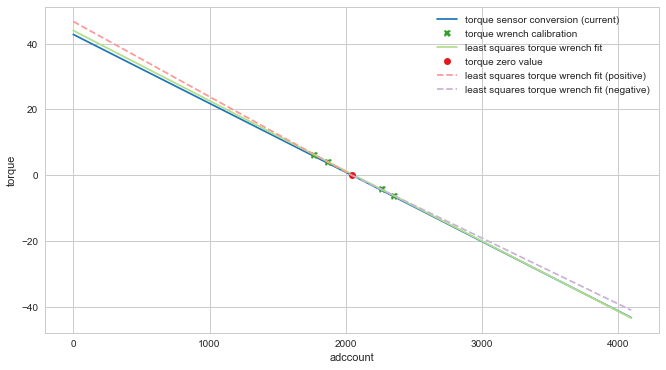

In [5]:
fig, ax = plt.subplots(figsize=(11, 6))

adcv = np.arange(2**12)
torque_sensor_pos = (-42.9314/2**11)*(adcv - 2042)
torque_sensor_pos_mask = (adcv < 2042).astype(int)
torque_sensor_neg = (-43.2969/2**11)*(adcv - 2046)
torque_sensor_neg_mask = (adcv > 2046).astype(int)
torque_sensor = (torque_sensor_pos*torque_sensor_pos_mask +
                 torque_sensor_neg*torque_sensor_neg_mask)
ax.plot(adcv, torque_sensor, color=colors[1],
        label='torque sensor conversion (current)')

torque_wrench_adc = np.array([1770, 1866, 2265, 2355])
torque_wrench_cal = np.array([6.2467, 4.1022, -4.2358, -6.3614])
ax.plot(torque_wrench_adc, torque_wrench_cal, color=colors[3],
        linestyle=' ', marker='X',
        label='torque wrench calibration')

# least squares fit through measured torque wrench values
A = np.vstack(
    [torque_wrench_adc,
     np.ones(len(torque_wrench_adc))]).T
m, c = np.linalg.lstsq(A, torque_wrench_cal)[0]
print('y = mx + c')
print('m =', m)
print('c =', c)
z = -c / m
print('zero adc value =', z)
ax.plot(adcv, adcv*m + c, color=colors[2],
        label='least squares torque wrench fit')

# display zero torque value
adc_zero = 2044
ax.plot([adc_zero], [0], color=colors[5],
        linestyle=' ', marker='o',
        label='torque zero value')

# separate positive/negative least squares fit
# that goes through zero
# y = m(x - adc_zero)
adc_pos = np.append(torque_wrench_adc[:2], [adc_zero]).reshape((-1, 1))
nm_pos = np.append(torque_wrench_cal[:2], [0]).reshape((-1, 1))
m_pos = np.linalg.lstsq(adc_pos - adc_zero, nm_pos)[0][0][0]
print('m pos:', m_pos)
ax.plot(adcv[:2**11],
        m_pos*(adcv[:2**11] - adc_zero),
        linestyle='--', color=colors[4],
        label='least squares torque wrench fit (positive)')

adc_neg = np.append([adc_zero], torque_wrench_adc[2:]).reshape((-1, 1))
nm_neg = np.append([0], torque_wrench_cal[2:]).reshape((-1, 1))
m_neg = np.linalg.lstsq(adc_neg - adc_zero, nm_neg)[0][0][0]
print('m neg:', m_neg)
ax.plot(adcv[2**11:],
        m_neg*(adcv[2**11:] - adc_zero),
        linestyle='--', color=colors[8],
        label='least squares torque wrench fit (negative)')

ax.set_xlabel('adccount')
ax.set_ylabel('torque')
ax.legend()
plt.show()

In [6]:
print('maximum measured torque:', m_pos * -2**11)
print('minimum measured torque:', m_neg * 2**11)

maximum measured torque: 46.8413319146
minimum measured torque: -41.005968217
